In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics,datasets,tree

In [2]:
digits = datasets.load_digits()

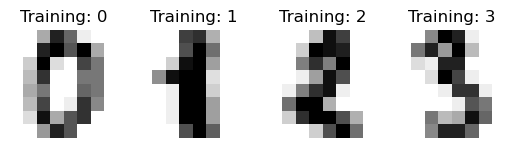

In [3]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images,digits.target))
for ax, (image, label) in zip(axes,images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i'% label)
plt.show()

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

In [5]:
classifier = tree.DecisionTreeClassifier(criterion="entropy",random_state=33)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,digits.target, test_size=0.2,shuffle=False)

In [7]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [8]:
predicted = classifier.predict(X_test)

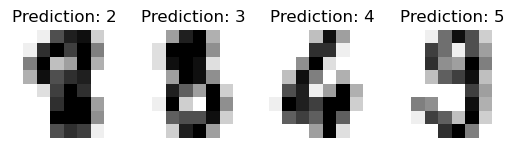

In [9]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))
for ax, (image,prediction) in zip(axes, images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Prediction: %i' %prediction)
plt.show()

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.72      0.64      0.68        36
           2       0.76      0.74      0.75        35
           3       0.69      0.59      0.64        37
           4       0.86      0.84      0.85        37
           5       0.80      0.95      0.86        37
           6       0.97      0.95      0.96        37
           7       0.78      0.86      0.82        36
           8       0.79      0.82      0.81        33
           9       0.72      0.70      0.71        37

    accuracy                           0.80       360
   macro avg       0.80      0.80      0.79       360
weighted avg       0.80      0.80      0.79       360




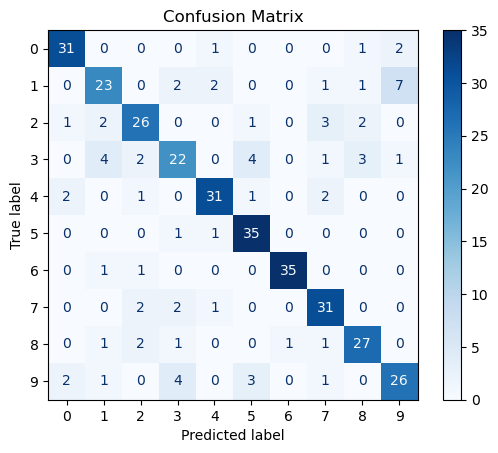

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(y_test, predicted)))

conf_matrix = metrics.confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

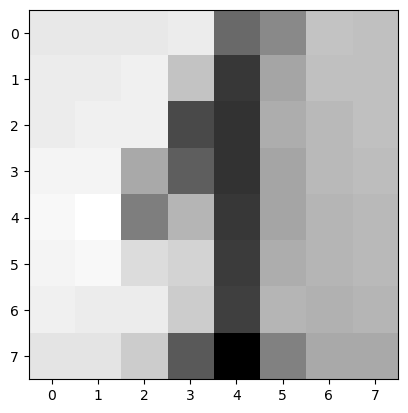

In [13]:
from PIL import Image, ImageOps

img = Image.open(r'D:/Admin/AnacondaProjects/thktdl/sample_1.jpg').convert("L").resize((8,8))
img = ImageOps.invert(img)
im2arr = np.array(img)
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation = 'nearest')

In [14]:
img1d = im2arr.reshape([1,64])
img1d[img1d > 109] = 155
img1d[img1d < 110] = 0
img1d

array([[  0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0, 155,
          0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0,   0,   0,
          0, 155, 155,   0,   0,   0,   0,   0,   0,   0, 155,   0,   0,
          0,   0,   0,   0,   0, 155,   0,   0,   0,   0,   0,   0,   0,
        155,   0,   0,   0,   0,   0,   0, 155, 155,   0,   0,   0]],
      dtype=uint8)

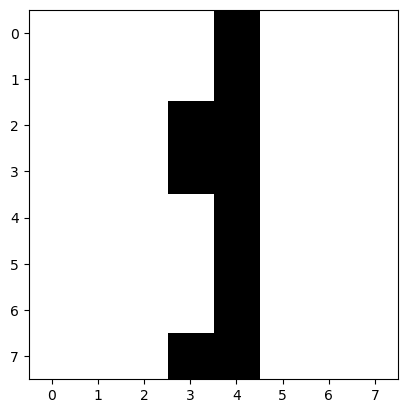

In [15]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation = 'nearest')

In [16]:
y_pred = classifier.predict(img1d)
print(y_pred)

[1]
